In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from adjustText import adjust_text
from highlight_text import fig_text

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/team/Manchester_City/2021'
url = base_url#scrape a single game shots. We will allow users to enter a base url

In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var datesData 	= JSON.parse('\x5B\x7B\x22id\x22\x3A\x2216385\x22,\x22isResult\x22\x3Atrue,\x22side\x22\x3A\x22a\x22,\x22h\x22\x3A\x7B\x22id\x22\x3A\x2282\x22,\x22title\x22\x3A\x22Tottenham\x22,\x22short_title\x22\x3A\x22TOT\x22\x7D,\x22a\x22\x3A\x7B\x22id\x22\x3A\x2288\x22,\x22title\x22\x3A\x22Manchester\x20City\x22,\x22short_title\x22\x3A\x22MCI\x22\x7D,\x22goals\x22\x3A\x7B\x22h\x22\x3A\x221\x22,\x22a\x22\x3A\x220\x22\x7D,\x22xG\x22\x3A\x7B\x22h\x22\x3A\x221.06014\x22,\x22a\x22\x3A\x222.10585\x22\x7D,\x22datetime\x22\x3A\x222021\x2D08\x2D15\x2015\x3A30\x3A00\x22,\x22forecast\x22\x3A\x7B\x22w\x22\x3A0.182572920134352945087385933220502920448780059814453125,\x22d\x22\x3A0.2038954632054717774902741211917600594460964202880859375,\x22l\x22\x3A0.6135316090549289835820445659919641911983489990234375\x7D,\x22result\x22\x3A\x22l\x22\x7D,\x7B\

In [4]:
#get only the shotsData
strings = scripts[1].string

In [5]:
strings

"\n\tvar datesData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2216385\\x22,\\x22isResult\\x22\\x3Atrue,\\x22side\\x22\\x3A\\x22a\\x22,\\x22h\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x2282\\x22,\\x22title\\x22\\x3A\\x22Tottenham\\x22,\\x22short_title\\x22\\x3A\\x22TOT\\x22\\x7D,\\x22a\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x2288\\x22,\\x22title\\x22\\x3A\\x22Manchester\\x20City\\x22,\\x22short_title\\x22\\x3A\\x22MCI\\x22\\x7D,\\x22goals\\x22\\x3A\\x7B\\x22h\\x22\\x3A\\x221\\x22,\\x22a\\x22\\x3A\\x220\\x22\\x7D,\\x22xG\\x22\\x3A\\x7B\\x22h\\x22\\x3A\\x221.06014\\x22,\\x22a\\x22\\x3A\\x222.10585\\x22\\x7D,\\x22datetime\\x22\\x3A\\x222021\\x2D08\\x2D15\\x2015\\x3A30\\x3A00\\x22,\\x22forecast\\x22\\x3A\\x7B\\x22w\\x22\\x3A0.182572920134352945087385933220502920448780059814453125,\\x22d\\x22\\x3A0.2038954632054717774902741211917600594460964202880859375,\\x22l\\x22\\x3A0.6135316090549289835820445659919641911983489990234375\\x7D,\\x22result\\x22\\x3A\\x22l\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2216387\\x22,

In [6]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [12]:
data

[{'id': '16385',
  'isResult': True,
  'side': 'a',
  'h': {'id': '82', 'title': 'Tottenham', 'short_title': 'TOT'},
  'a': {'id': '88', 'title': 'Manchester City', 'short_title': 'MCI'},
  'goals': {'h': '1', 'a': '0'},
  'xG': {'h': '1.06014', 'a': '2.10585'},
  'datetime': '2021-08-15 15:30:00',
  'forecast': {'w': 0.18257292013435295,
   'd': 0.20389546320547178,
   'l': 0.613531609054929},
  'result': 'l'},
 {'id': '16387',
  'isResult': True,
  'side': 'h',
  'h': {'id': '88', 'title': 'Manchester City', 'short_title': 'MCI'},
  'a': {'id': '79', 'title': 'Norwich', 'short_title': 'NOR'},
  'goals': {'h': '5', 'a': '0'},
  'xG': {'h': '2.43928', 'a': '0.0250088'},
  'datetime': '2021-08-21 14:00:00',
  'forecast': {'w': 0.9074410092926852,
   'd': 0.09033852887365644,
   'l': 0.002220411239042117},
  'result': 'w'},
 {'id': '16396',
  'isResult': True,
  'side': 'h',
  'h': {'id': '88', 'title': 'Manchester City', 'short_title': 'MCI'},
  'a': {'id': '83', 'title': 'Arsenal', 'sh

In [17]:
datetime = []
xG = []
xGA = []
result = []
team = []
GF = []
GA = []

for index in range(11):
    for key in data[index]:
        if key == 'datetime':
            datetime.append(data[index][key])
        if key == 'result':
            result.append(data[index][key])
    if data[index].get('side') == 'h':
        xG.append(float(data[index].get('xG').get('h')))
        xGA.append(float(data[index].get('xG').get('a')))
        team.append(data[index].get('a').get('title'))
        GF.append(int(data[index].get('goals').get('h')))
        GA.append(int(data[index].get('goals').get('a')))
    if data[index].get('side') == 'a':
        xG.append(float(data[index].get('xG').get('a')))
        xGA.append(float(data[index].get('xG').get('h')))
        team.append(data[index].get('h').get('title'))
        GF.append(int(data[index].get('goals').get('a')))
        GA.append(int(data[index].get('goals').get('h')))

In [18]:
col_names = ['DateTime', 'GF', 'GA', 'xG','xGA','Result','Opponent']
df = pd.DataFrame([datetime,GF,GA,xG,xGA,result,team],index=col_names)
df = df.T

In [19]:
df

,DateTime,GF,GA,xG,xGA,Result,Opponent
0,2021-08-15 15:30:00,0,1,2.10585,1.06014,l,Tottenham
1,2021-08-21 14:00:00,5,0,2.43928,0.0250088,w,Norwich
2,2021-08-28 11:30:00,5,0,4.47273,0.116805,w,Arsenal
3,2021-09-11 14:00:00,1,0,2.75058,0.8001,w,Leicester
4,2021-09-18 14:00:00,0,0,1.22451,0.490923,d,Southampton
5,2021-09-25 11:30:00,1,0,1.69244,0.194202,w,Chelsea
6,2021-10-03 15:30:00,2,2,1.04319,0.949368,d,Liverpool
7,2021-10-16 14:00:00,2,0,2.15712,1.07719,w,Burnley
8,2021-10-23 16:30:00,4,1,3.57376,1.1695,w,Brighton
9,2021-10-30 14:00:00,0,2,0.65739,1.05029,l,Crystal Palace


In [54]:
TEAM_NAME = "Manchester City"

window = 2
gd_color = "dodgerblue"
xgd_color = "gold"

# df["GD"] = df["GF"] - df["GA"]
# df["xGD"] = df["xG"] - df["xGA"]

gd_rolling = df["GF"]
xgd_rolling = df["xG"]

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

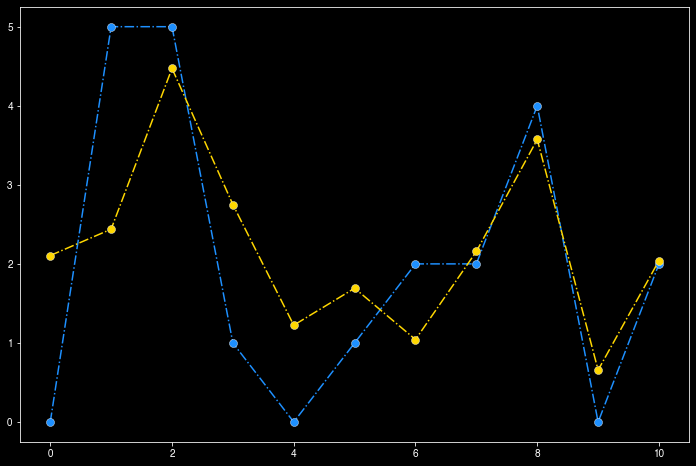

In [55]:
with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(gd_rolling, color=gd_color,  linestyle="-.", marker="o",  mfc=gd_color, mec="white", markersize=8, mew=0.4, zorder=10)  ##goal-difference
    ax.plot(xgd_rolling, color=xgd_color,  linestyle="-.", marker = "o", mfc=xgd_color, mec="white", markersize=8, mew=0.4, zorder=10) ##expected goals difference
    
    ax.fill_between(x=range(len(gd_rolling)), y1=gd_rolling, y2=xgd_rolling, where = gd_rolling>xgd_rolling, 
                    alpha=0.2, color=gd_color, interpolate=True, zorder=5) ##shade the areas in between
    ax.fill_between(x=range(len(gd_rolling)), y1=gd_rolling, y2=xgd_rolling, where = gd_rolling<=xgd_rolling, 
                    alpha=0.2, color=xgd_color, interpolate=True, zorder=5)
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)  
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## labels, titles and subtitles
    ax.set(xlabel=f"Matchday", xlim=(0, 11))  
    ax.xaxis.label.set(fontsize=12, fontweight='bold')    

    fig.text(x=0.08, y=0.92, s="Manchester City | Performance Trend", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s='Premier League | 2021-22 | <Goals Scored> vs <Expected Goals>',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()],
             highlight_textprops=[{"color": gd_color},
                                  {"color": xgd_color}])
    
fig.savefig("xg-trend-line-chart-2021", dpi=180) ##save image